# Financial Data Analysis (Yahoo Finance) 💰
Author: Helen Wu
Date: 2024/04/01

This project utilizes the Yahoo Finance API for financial data analysis, focusing on retrieving historical stock prices, constructing various investment portfolios, and evaluating their performance with risk-adjusted metrics. It explores diverse investment principles, such as S&P 500 stocks, stock-bond combinations, and a diversified Permanent Portfolio. Through metrics of Maximum Drawdown and Sharpe Ratio, it assesses risk-adjusted performance. Future enhancements may include incorporating additional asset classes, implementing rebalance strategies, conducting scenario analysis, and applying machine learning for predictive analytics. Overall, this project lays the groundwork for refining portfolio management and investment decisions within corporate settings.

# Data Preparation
The project begins by importing necessary packages such as yfinance, pandas, numpy, matplotlib, and scipy.stats. The data retrieval process involves fetching historical stock prices for selected US (Magnificent Seven) and Hong Kong stocks (Alibaba, China Mobile) from the Yahoo Finance API. We use the close price for simplicity purposes, though real traders take the order book structure into consideration.

In [1]:
import yfinance as yahooFinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy
import warnings

# To disable all warnings
warnings.filterwarnings("ignore")

In [2]:
## Import the Data
us_stock = [
    "META",   # Meta Platforms
    "AMZN", # Amazon
    "AAPL", # Apple
    "TSLA", # TESLA
    "GOOGL",# Google (Alphabet)
    "NVDA", # NVIDIA
    "MSFT",# Microsoft
    "^GSPC", # S&P 500
    'GC=F'
]
hist_df1 = pd.DataFrame(columns = us_stock)
for ticker in us_stock:
    info = yahooFinance.Ticker(ticker)
    hist_df1[ticker] = info.history(period="5y")["Close"]
hong_kong_stock = [
    "9988.HK", # Alibaba Group Holding Ltd
    "0941.HK" # China Mobile Limited  中国移动
]
hist_df2 = pd.DataFrame(columns = hong_kong_stock)

for ticker in hong_kong_stock:
    info = yahooFinance.Ticker(ticker)
    hist_df2[ticker] = info.history(period="5y")["Close"]
hist_df1.reset_index(inplace=True)
hist_df2.reset_index(inplace=True)

In [3]:
# Combine the Dataset into one
hist_df1["Date"] = hist_df1['Date'].dt.date
hist_df2["Date"] = hist_df2["Date"].dt.date
hist_df = pd.merge(hist_df1,hist_df2)
hist_df.set_index('Date', inplace=True)
hist_df.dropna(inplace=True)
hist_df

,META,AMZN,AAPL,TSLA,GOOGL,NVDA,MSFT,^GSPC,GC=F,9988.HK,0941.HK
Date,,,,,,,,,,,
2019-11-26,198.759109,89.847000,64.287903,21.927999,65.650002,53.996464,146.231461,3140.520020,1459.800049,187.272720,46.244240
2019-11-27,201.785904,90.925499,65.151443,22.086000,65.606499,54.345081,146.510406,3153.629883,1453.400024,192.862946,46.056408
2019-11-29,201.426285,90.040001,65.007912,21.996000,65.204498,53.971561,145.606262,3140.979980,1465.599976,198.053879,44.328354
2019-12-02,199.488342,89.080002,64.256302,22.324667,64.443001,52.106426,143.846039,3113.870117,1462.300049,195.158936,44.591316
2019-12-03,198.609283,88.498001,63.110600,22.413334,64.737000,51.710499,143.615234,3093.199951,1478.199951,192.264008,44.628887
...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,503.019989,179.710007,170.850006,172.630005,150.070007,950.020020,422.859985,5218.189941,2174.800049,70.300003,66.750000
2024-03-26,495.890015,178.300003,169.710007,177.669998,150.669998,925.609985,421.649994,5203.580078,2175.600098,70.300003,67.500000
2024-03-27,493.859985,179.830002,173.309998,179.830002,150.869995,902.500000,421.429993,5248.490234,2190.600098,68.800003,67.099998


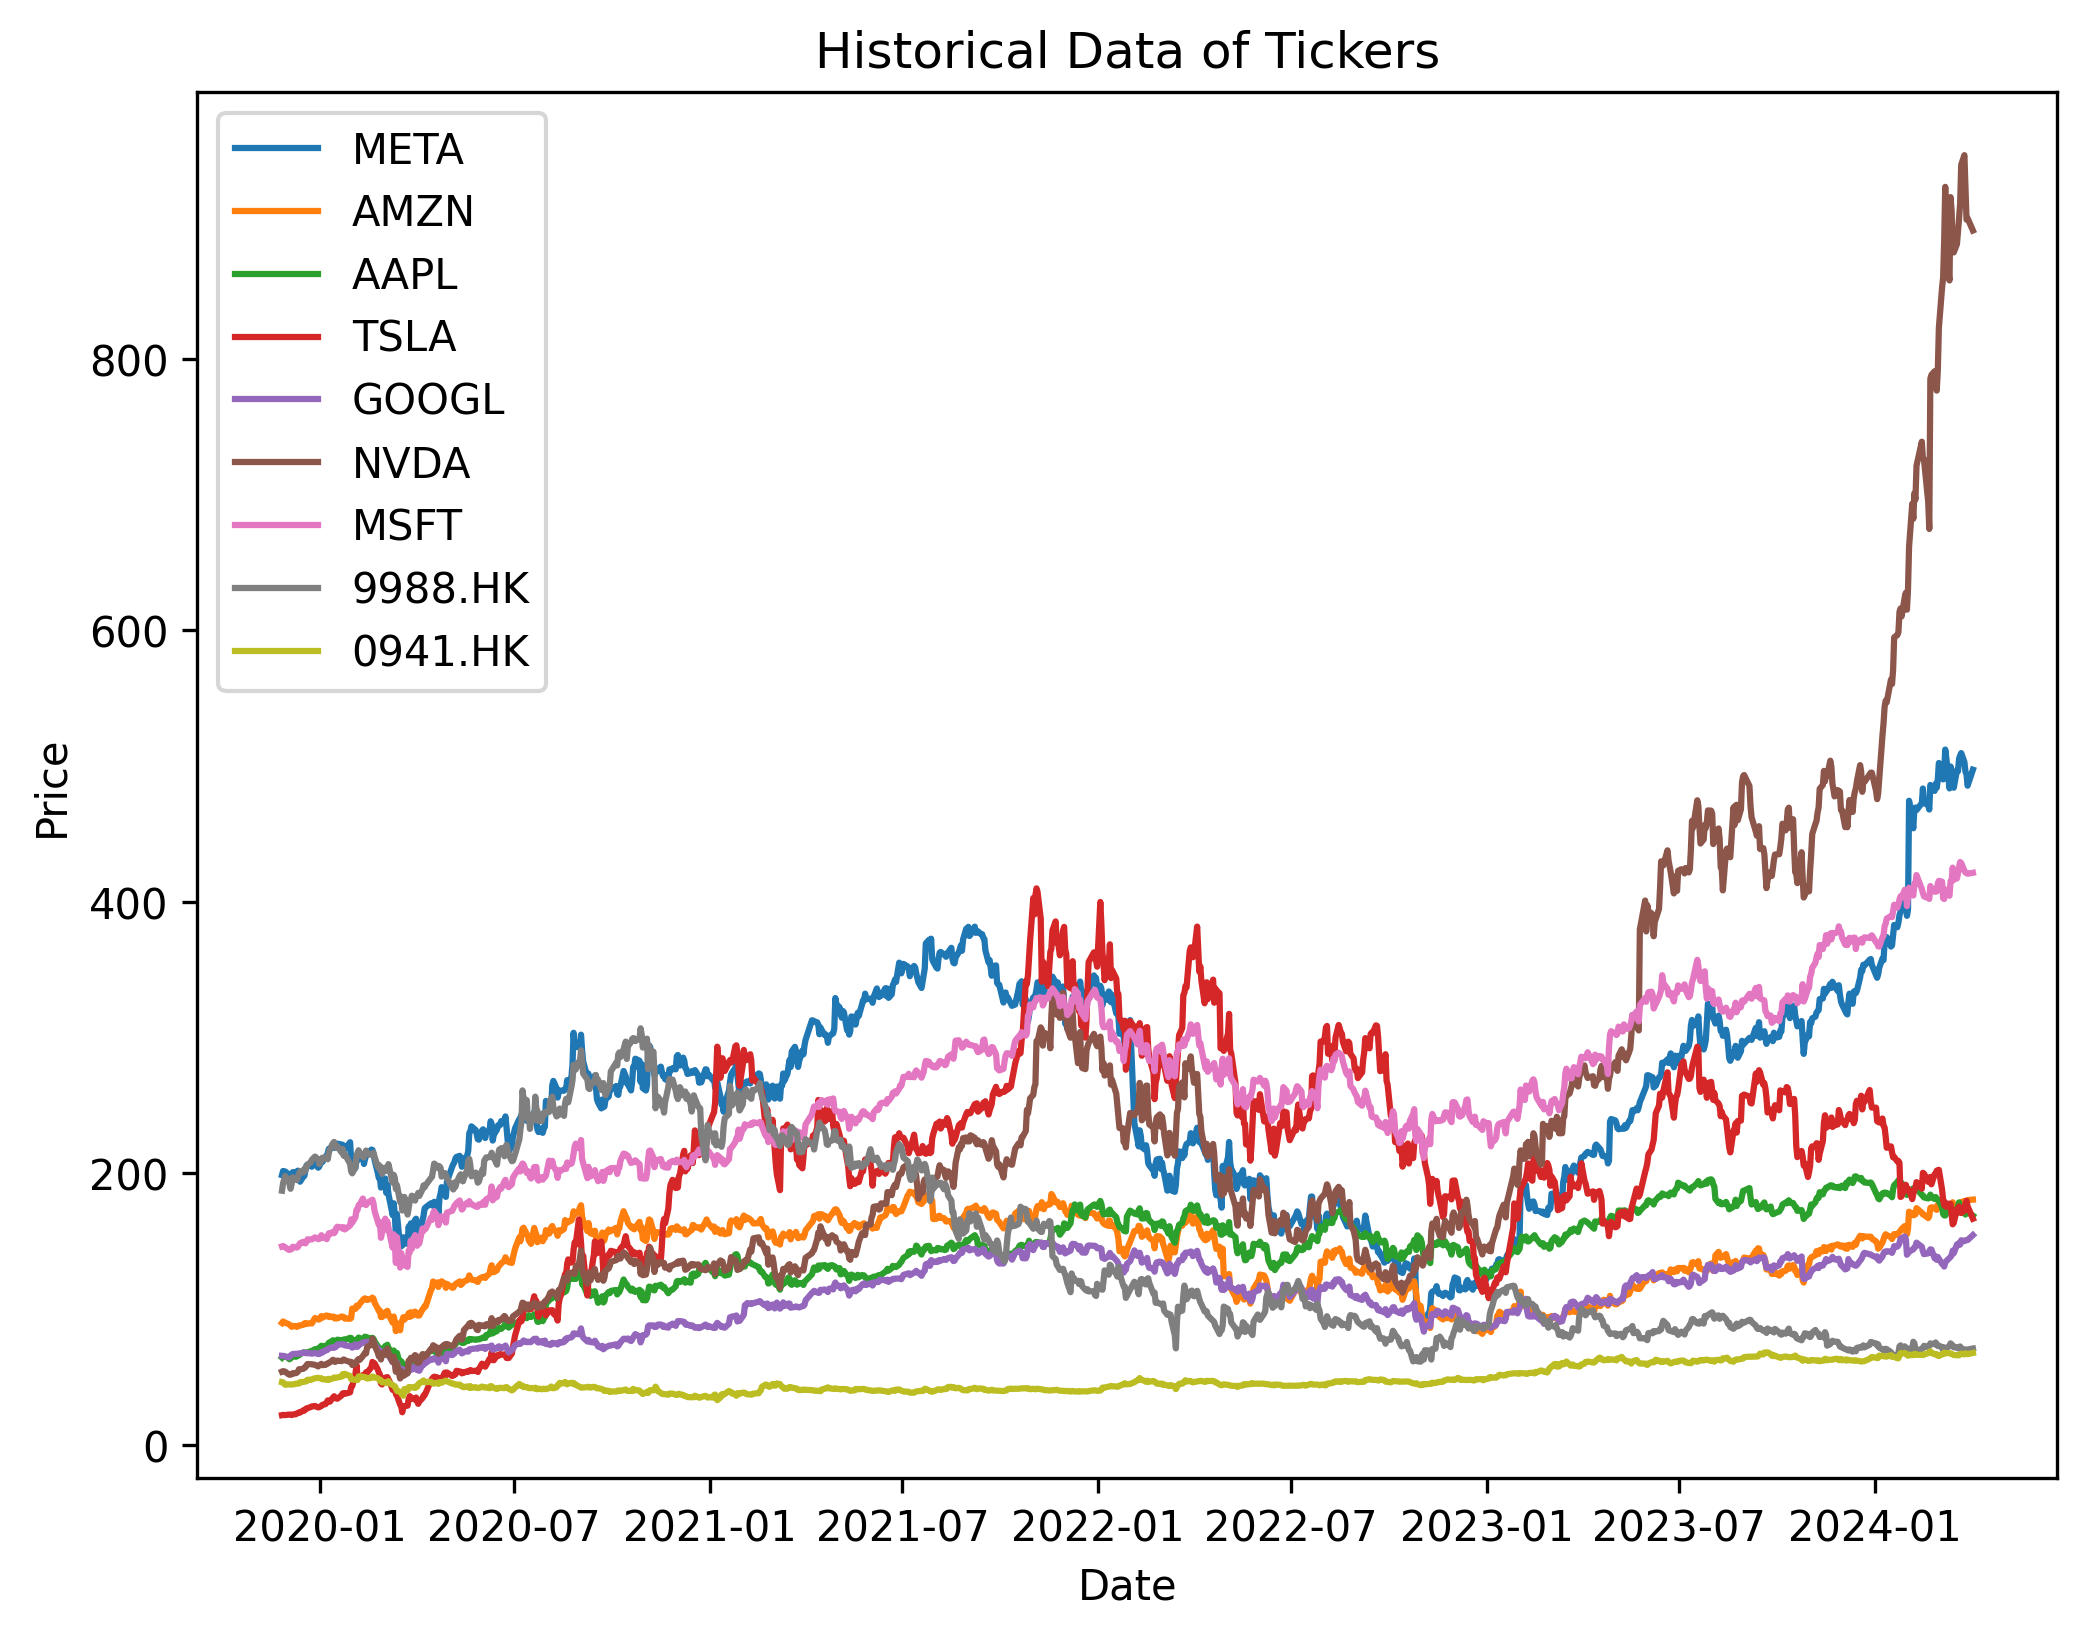

In [4]:
tickers1 = us_stock[:len(us_stock) - 2] + hong_kong_stock
plt.figure(figsize=(8, 6), dpi = 300)     
for ticker in tickers1:
    plt.plot(hist_df[ticker])
plt.title("Historical Data of Tickers")
plt.legend(tickers1, loc = "upper left")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()
    

Before making comparisons, it is imperative to standardize the prices. Therefore, each column is devided by its first price observation respectively. Also, a risk-free ratio is added to the portfolio, assuming the rate is 5% for simplicity purpose. A more straightforward graph can be generated as follows.

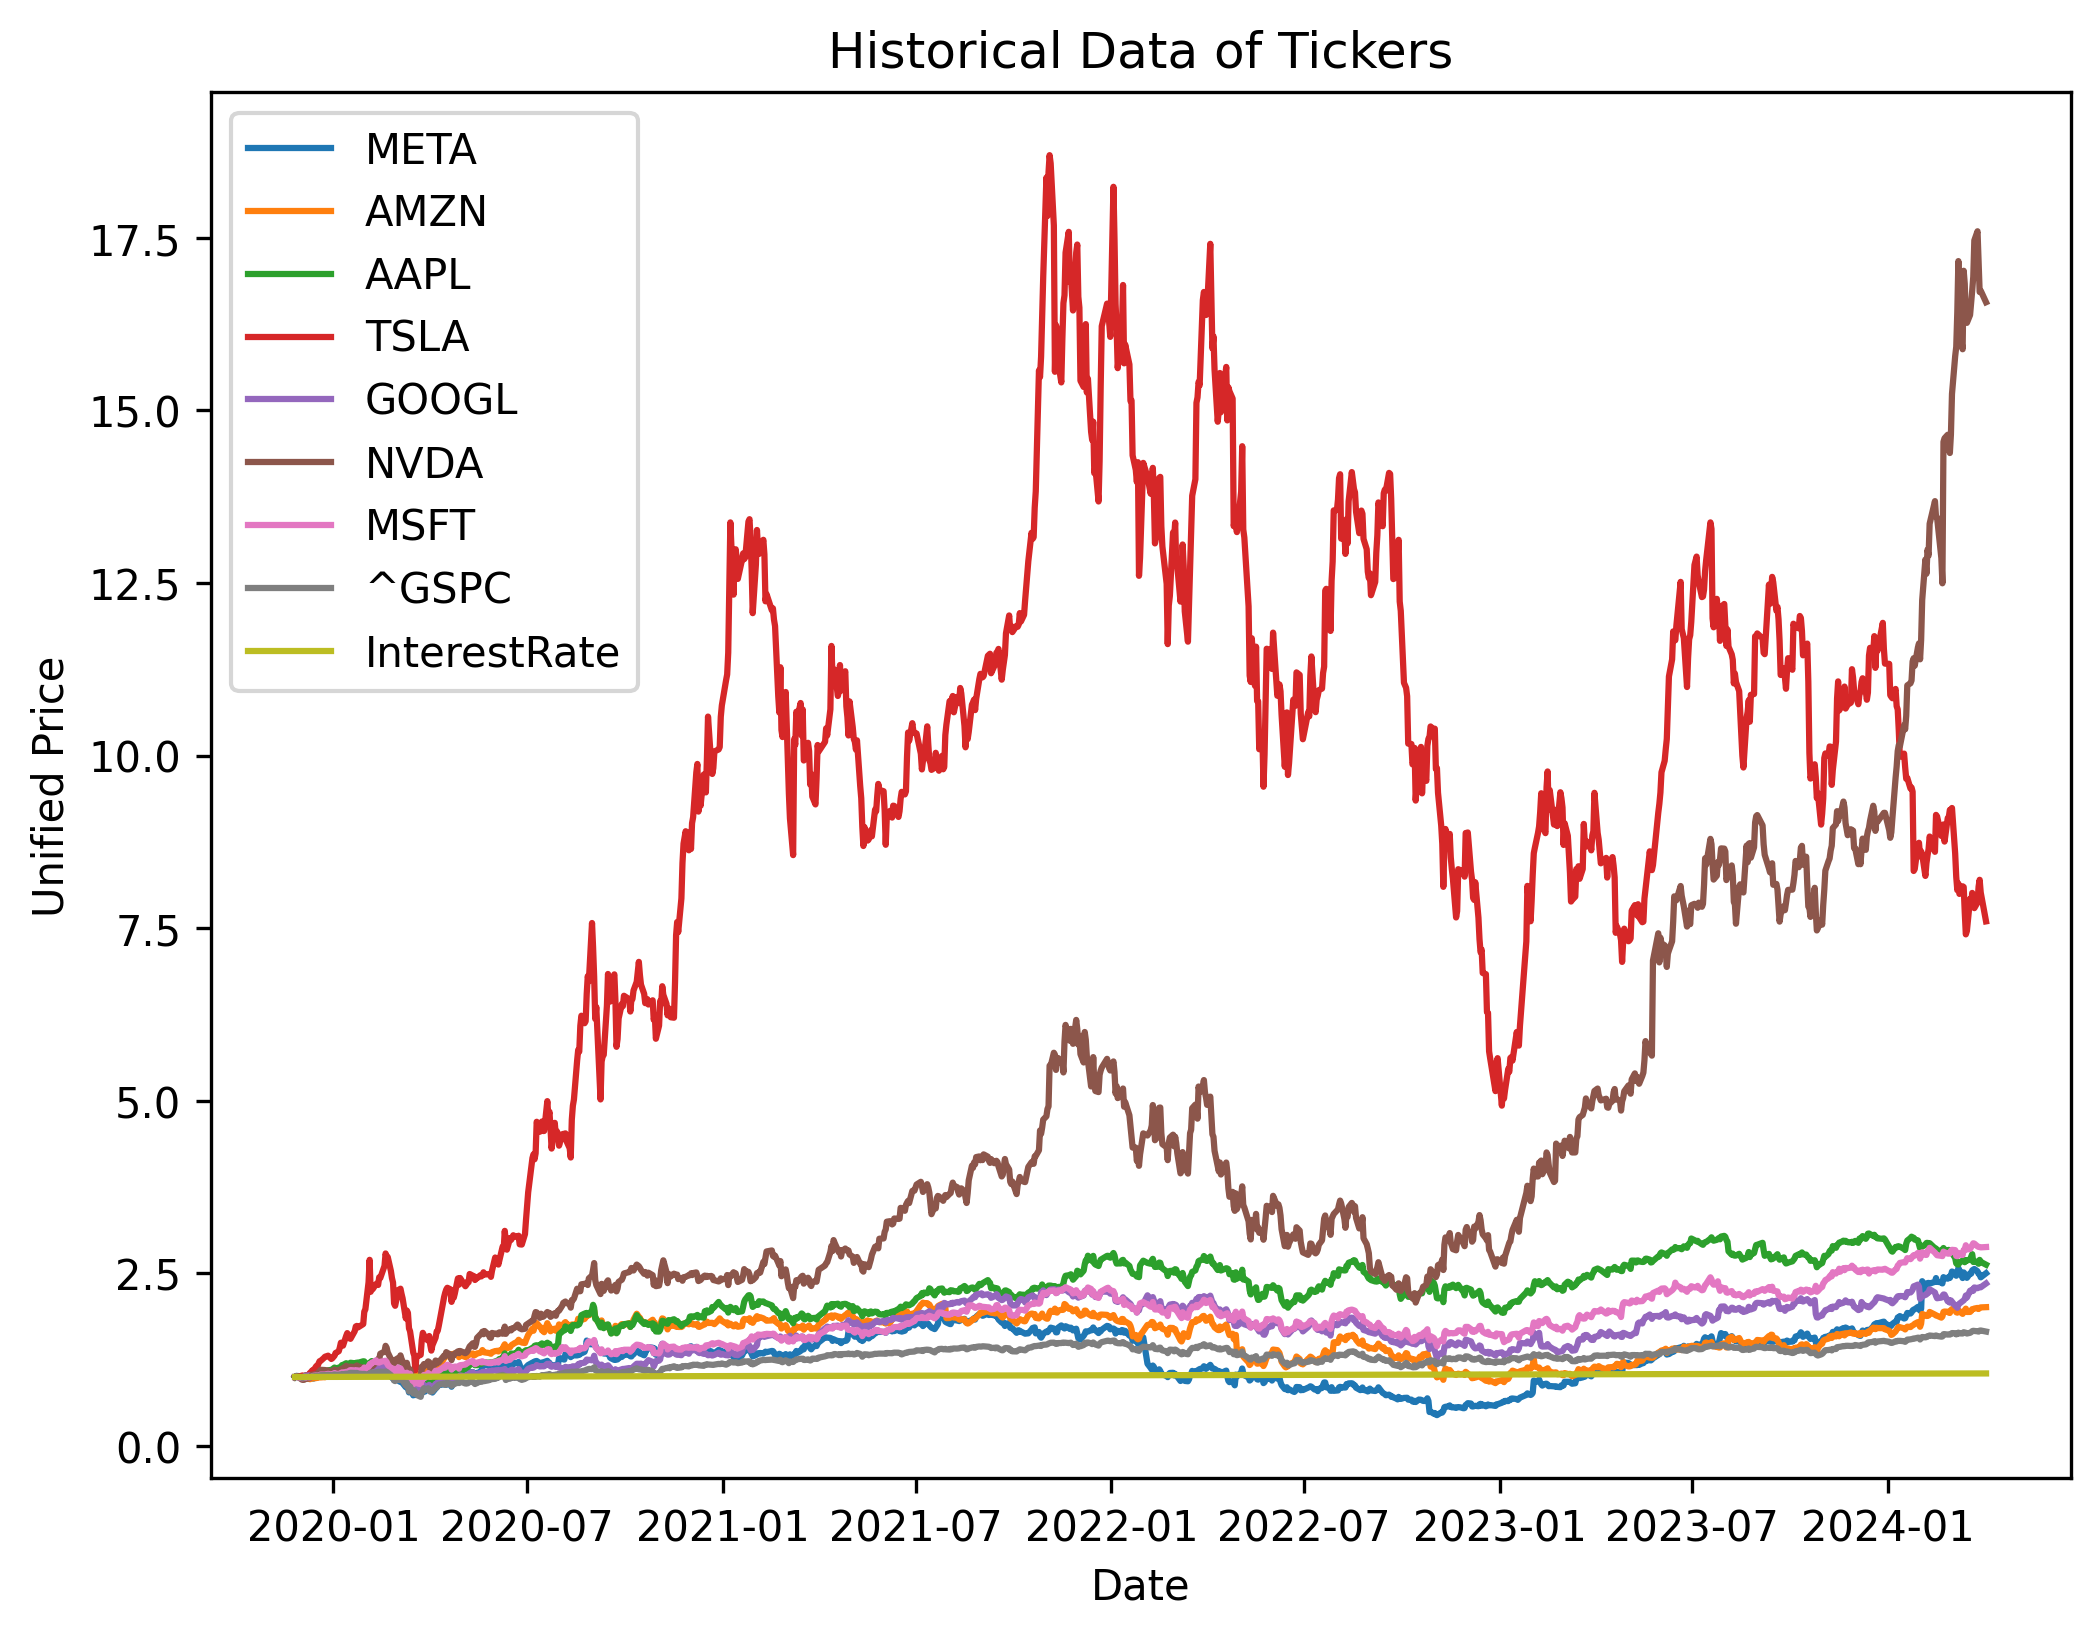

In [5]:
unified_hist_df = hist_df/hist_df.loc[hist_df.index[0]]
r = 0.05
unified_hist_df["InterestRate"] = [1*np.exp(r*T/len(unified_hist_df)) for T in range(len(unified_hist_df))]
tickers = us_stock + hong_kong_stock

plt.figure(figsize=(8, 6), dpi = 300)     
for ticker in tickers[:len(us_stock) - 1]+["InterestRate"]:
    plt.plot(unified_hist_df[ticker])
plt.title("Historical Data of Tickers")
plt.legend(tickers[:len(us_stock) - 1]+["InterestRate"], loc = "upper left")
plt.xlabel("Date")
plt.ylabel("Unified Price")
plt.show()

In [6]:
unified_hist_df

,META,AMZN,AAPL,TSLA,GOOGL,NVDA,MSFT,^GSPC,GC=F,9988.HK,0941.HK,InterestRate
Date,,,,,,,,,,,,
2019-11-26,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-11-27,1.015228,1.012004,1.013432,1.007205,0.999337,1.006456,1.001908,1.004174,0.995616,1.029851,0.995938,1.000048
2019-11-29,1.013419,1.002148,1.011200,1.003101,0.993214,0.999539,0.995725,1.000146,1.003973,1.057569,0.958570,1.000096
2019-12-02,1.003669,0.991463,0.999508,1.018090,0.981615,0.964997,0.983687,0.991514,1.001713,1.042111,0.964257,1.000144
2019-12-03,0.999246,0.984986,0.981687,1.022133,0.986093,0.957665,0.982109,0.984932,1.012604,1.026653,0.965069,1.000192
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,2.530802,2.000178,2.657576,7.872583,2.285910,17.594115,2.891717,1.661569,1.489793,0.375388,1.443423,1.051019
2024-03-26,2.494930,1.984485,2.639844,8.102426,2.295049,17.142048,2.883442,1.656917,1.490341,0.375388,1.459641,1.051069
2024-03-27,2.484716,2.001514,2.695842,8.200931,2.298096,16.714057,2.881938,1.671217,1.500617,0.367379,1.450991,1.051120


## Construct the portfolio

Here, we pick several most common portfolio and analyzes their outcome. The composition of each portfolio is listed as follows:

<b>Portfolio 1</b> : 100% Stock in S&P 500

<b> Portfolio 2.1</b> : 60/40 - 60% in Magnficent seven (10% META, 10% APPL, 10% AMAZN, 10% TSLA, 10% NVDA, 5% GOOGL, 5% MSFT) and 40% in bonds.

<b> Portfolio 2.2</b> : 60/40 - 60% in S&P500 and 40% in bonds.

<b> Portfolio 3</b> :25% stocks, 25% long-term bonds, 25% cash, 25% gold.

In [7]:
# define a function that prints out the portfolio return
def plot_portfolio(portfolio, portfolio_name):
    plt.plot(portfolio)
    plt.title(portfolio_name)
    plt.legend(["Portfolio Value"], loc = "upper left")
    plt.xlabel("Date")
    plt.ylabel("Portfolio Value")
    plt.show()

In [8]:
portfolio1 = unified_hist_df["^GSPC"]
portfolio2_1 = unified_hist_df["META"] * 0.1 + unified_hist_df["AAPL"] * 0.1 + unified_hist_df["AMZN"] * 0.1 +  unified_hist_df["TSLA"] * 0.1 +  unified_hist_df["NVDA"] * 0.1 +  unified_hist_df["GOOGL"] * 0.05 + unified_hist_df["MSFT"] * 0.05 + unified_hist_df["InterestRate"]*0.4
portfolio2_2 = unified_hist_df["^GSPC"] * 0.6 + unified_hist_df["InterestRate"]*0.4
portfolio3 = unified_hist_df["^GSPC"] * 0.25 + unified_hist_df["InterestRate"]*0.25 + unified_hist_df["GC=F"] * 0.25 + 0.25

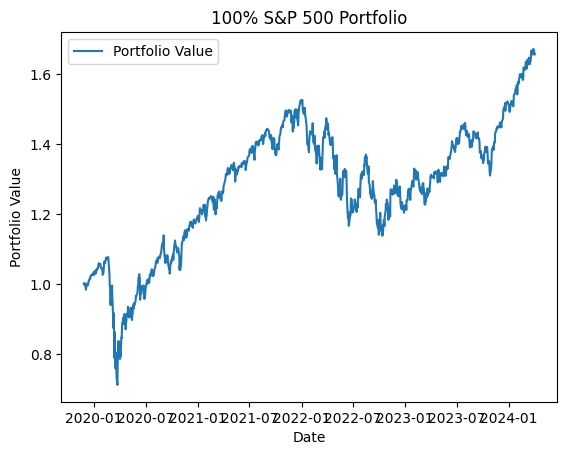

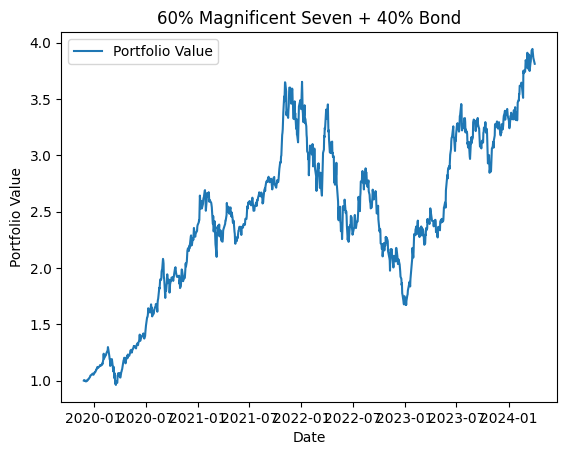

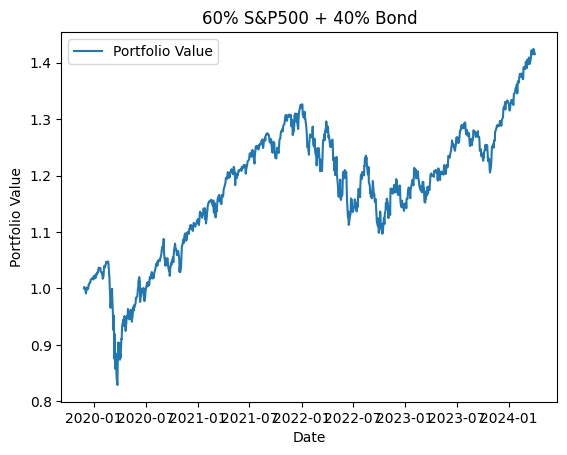

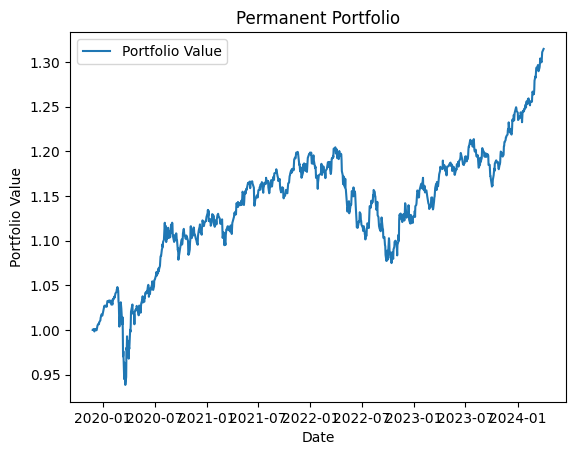

In [9]:
portfolio_name = ["100% S&P 500 Portfolio", 
                  "60% Magnificent Seven + 40% Bond", 
                  "60% S&P500 + 40% Bond", 
                  "Permanent Portfolio"]
port = [portfolio1,portfolio2_1, portfolio2_2, portfolio3]
for i in range(4):
    plot_portfolio(port[i],portfolio_name[i])

# Risk-Return Trade-Off

To assess the risk-return trade-off of our portfolios effectively, it's essential to evaluate it using key metrics that provide valuable insights. Here, I choose both Maximum Drawdown ($MDD$) and Sharp Ratio because these two are the most commonly used. Maximum Drawdown helps investors understand the worst loss they could have faced, while the Sharpe Ratio helps assess the return an investment provides per unit of risk taken. With a combination of two, we can get a better idea of a portfolio's resilience during adverse market conditions, whether it's bear, bull, or fluctuative, which is valuable for long-term performance evaluation and comparability across different investment strategies. Below is a better explanation of MDD and Sharp Ratio:

<b>Maximum Drawdown ($MDD$)</b>: The MDD measures the largest peak-to-trough decline in the portfolio's value. To calculate $MDD$, subtract the trough value ($Q) from the peak value ($P$) of the portfolio during a specified period, and then divide the result by the peak value. 

Formula: $MDD = \frac{(P - Q)}{P}$.

<b>Sharpe Ratio</b>: The Sharpe Ratio helps assess the risk-adjusted return of the portfolio by comparing its excess returns to a risk-free rate. To calculate the Sharpe Ratio, subtract the risk-free rate ($R_f$) from the portfolio return ($R_p$), and then divide the result by the standard deviation of the portfolio's excess returns.

Formula: $Sharpe$ $Ratio$ $= \frac{R_p-R_f}{\sigma_p}$.

In [10]:
def sharpe_ratio(returns, risk_free_rate=0):
    excess_returns = returns - risk_free_rate
    mean_excess_return = np.mean(excess_returns)
    std_dev = np.std(returns)
    sharpe_ratio = mean_excess_return / std_dev
    return sharpe_ratio

def calculate_mdd(pct):
    max_drawdown = 0
    peak = pct[0]
    for i in range(1, len(pct)):
        if pct[i] > peak:
            peak = pct[i]
        else:
            drawdown = (peak - pct[i]) / peak
            max_drawdown = max(max_drawdown, drawdown)
    return max_drawdown

In [11]:
def calculate_annual_yield(total_return, years = 5):
    annualized_return = ((1 + total_return) ** (1 / years)) - 1
    
    # Convert annualized return to percentage
    annualized_return_percentage = annualized_return * 100
    
    return annualized_return_percentage

In [12]:
portfolio_name = ["100% S&P 500 Portfolio", 
                  "60% Magnificent Seven + 40% Bond", 
                  "60% S&P500 + 40% Bond", 
                  "Permanent Portfolio"]
port = [portfolio1,portfolio2_1, portfolio2_2, portfolio3]
data = []
for i in range(4):
    data.append({"name":portfolio_name[i], "MDD%": calculate_mdd(port[i])*100, "Sharp Ratio": sharpe_ratio(port[i]-1, .05), "Annual Percentage Yield % (APY)": calculate_annual_yield((port[i].tail(1)[0] - 1)),"Total Return% (5 Years)": (port[i].tail(1)[0] - 1)*100})
summary = pd.DataFrame(data)
summary

,name,MDD%,Sharp Ratio,Annual Percentage Yield % (APY),Total Return% (5 Years)
0,100% S&P 500 Portfolio,33.924960,1.238922,10.636225,65.762677
1,60% Magnificent Seven + 40% Bond,54.220834,1.950792,30.691968,281.280401
2,60% S&P500 + 40% Bond,20.900549,1.103550,7.190238,41.506430
3,Permanent Portfolio,10.754621,1.365596,5.620201,31.442241


# Optimal Portfolio

There isn't a one-size-fits-all optimal portfolio for every investor. Portfolio performance depends on various factors, including market conditions—whether bullish, bearish, or turbulent. What may be effective today might not necessarily be so tomorrow. 

According to the data, in the current bull market in the past five years, a `60/40 allocation (Magnificent Seven stocks)` could yield the highest return, with an Annual Percentage Yield (APY) around 30.7%. However, this comes with increased volatility and potential for larger losses, given its heavy exposure to equities and higher Maximum Drawdown (MDD). Its heavy reliance on individual stocks can yield significant gains during bullish market conditions but may also result in substantial losses during economic downturns. Similarly, a portfolio comprising of `100% S&P 500 Portfolio` performs pretty well, with an APY of 10.64% but it could also incur certain losses during market fluctuations and bearish periods, due to its composition of purely equities.

On the other hand, the `Permanent Portfolio` offers stability with the smallest MDD (10.75%), albeit with the lowest APY of 5.72%, slightly better than holding bonds. It's a suitable choice for risk-averse investors seeking a balance between returns and risks. Meanwhile, a `60% S&P500 and 40% bond` allocation could be ideal for those seeking a middle ground.

In conclusion, investors must carefully consider their risk tolerance, investment goals, and market conditions when constructing their portfolios. Diversification and periodic reassessment are essential strategies to navigate the dynamic nature of the market and achieve long-term financial objectives.


<b>General Suggestions</b>:

Portfolio for Risk-Tolerant Investors: `100% S&P 500 Portfolio` or `60% Magnificent Seventy + 40% Bond`

Portfolio for Risk-Averse Investors: `60% S&P500 + 40% Bond`